# Project Stage II - Calvin Ng
## Functions and Package Imports
Below are the functions and package imports I will be using for this stage. The functions I wrote myself for the group section of this stage and have either directly copied from the group notebook or have made minor adjustments for use in the individual section. There are also a few other functions that I have written specifically for this individual portion.

In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cumulate_weekly_data_columns(df, start_index, end_index):
    '''
    Given a start and end column, this function sums up
    each column in between and then groups days by week.
    This function is used to read data from the df set
    containing data from the US.
    :param df: the dataframe from which data is read from.
    :param start_index: The starting columnn.
    :param end_index: The ending column.
    :return: Two lists; one containing weeks and the other
    containing the summation of the columns of that week.
    '''
    # calculate summation of previous week
    prev_sum = 0
    prev_day = df.iloc[:, start_index - 8].sum()
    for i in range(start_index - 7, start_index):
        col = df.iloc[:, i]
        curr_day = col.sum()
        prev_sum += curr_day - prev_day
        prev_day = curr_day

    curr_sum = 0
    days_passed = 0
    weekly_x = []
    weekly_y = []
    
    # cumulate weekly data
    for i in range(start_index, end_index + 1):
        col = df.iloc[:, i]
        curr_day = col.sum()
        curr_sum += curr_day - prev_day
        prev_day = curr_day
        days_passed += 1
        if days_passed == 7:
            weekly_y.append(curr_sum)
            curr_sum = 0
            days_passed = 0
            begin_week = df.columns[i - 6]
            weekly_x.append(begin_week[-5:])
    
    return weekly_x, weekly_y

In [3]:
def print_stats(data, country, data_type):
    '''
    Prints mean, median, and mode about the
    given dataset.
    :param data: A list containing the data.
    :param country: The name of the country 
    the data belongs to.
    :param data_type: What type of data is
    contained in data.
    '''
    
    print('%s weekly %s mean: %15.2f' % (country, data_type, stat.mean(data)))
    print('%s weekly %s median: %13.2f' % (country, data_type, stat.median(data)))
    print('%s weekly %s mode: %15.2f' % (country, data_type, stat.mode(data)))

In [4]:
def normalize(dataset, population, normalization_factor):
    '''
    This function normalizes a set of values given a
    populationa nd normalization factor.
    :param dataset: An iterable structure containing the
    data we want to normalize.
    :param population: The population the data is describing.
    It is an integer.
    :param normalization_factor: An integer defining the
    noramlization factor; per 10,000, per 100,000, etc.
    '''
    normalized_data = []
    
    # avoid division by zero
    if population == 0:
        population = 1

    for data in dataset:
        normalized_data.append(data / population * normalization_factor)
        
    return normalized_data

## Section I: Overview of North Carolina

Continuing my work from the previous stage, I will calculate statistics for North Carolina. Specifically, I will calculate the mean, median, and mode. For this section, these will be unnormalized values.

The general methodology is very similar to the group notebook. The only difference is we will only be keeping rows where the state is 'NC.'

In [5]:
# read base df
base = pd.read_csv('../Data/base_set_joined.csv')

In [6]:
# drop non-NC rows
nc_df = base.drop(base[base['State'] != 'NC'].index)

# get NC population
nc_population = nc_df['population'].sum()

In [7]:
# get start and end indices
start_index = nc_df.columns.get_loc("cases 2022-06-01")
end_index = nc_df.columns.get_loc("cases 2022-12-31")

# calculate and print new cases stats
nc_cases_x, nc_cases_y = cumulate_weekly_data_columns(nc_df, start_index, end_index)    
print_stats(nc_cases_y, 'NC', 'cases')

NC weekly cases mean:        19062.00
NC weekly cases median:      20382.50
NC weekly cases mode:        27790.00


In [8]:
# get start and end indices
start_index = nc_df.columns.get_loc("deaths 2022-06-01")
end_index = nc_df.columns.get_loc("deaths 2022-12-31")

# calculate and print new deaths stats
nc_deaths_x, nc_deaths_y = cumulate_weekly_data_columns(nc_df, start_index, end_index)    
print_stats(nc_deaths_y, 'NC', 'deaths')

NC weekly deaths mean:           99.00
NC weekly deaths median:         47.50
NC weekly deaths mode:           48.00


## Section II: Comparison to Other States

Now that we have numbers from North Carolina, we'll repeat the process for three other states. From there, I will plot the data in two separate graphs: one for new cases and one for new deaths. The states I have chosen are New York, Florida, and Kansas. I chose New York and Florida because they are also east coast states with different approaches to the pandemic. 

Influenced largely by its governor, Florida has been relatively lenient on its Covid restrictions while New York and North Carolina have been more restrictive. In the past year, most states have let up on restrictions, so I'm referring to the early response during the first couple of years.

I chose Kansas because it's a largely rural state, so it offers a chance to compare the recent impact of covid between relatively urban vs rural states. New York also offers this opportunity; despite the fact that it is home to one of the largest cities in the US, most of the state is rural.

In [9]:
# drop non-NY rows
ny_df = base.drop(base[base['State'] != 'NY'].index)

# get NY population
ny_population = ny_df['population'].sum()

In [10]:
# get start and end indices
start_index = ny_df.columns.get_loc("cases 2022-06-01")
end_index = ny_df.columns.get_loc("cases 2022-12-31")

# calculate and print new cases stats
ny_cases_x, ny_cases_y = cumulate_weekly_data_columns(ny_df, start_index, end_index)    
print_stats(ny_cases_y, 'NY', 'cases')

NY weekly cases mean:        32705.00
NY weekly cases median:      30939.00
NY weekly cases mode:        43135.00


In [11]:
# get start and end indices
start_index = ny_df.columns.get_loc("deaths 2022-06-01")
end_index = ny_df.columns.get_loc("deaths 2022-12-31")

# calculate and print new deaths stats
ny_deaths_x, ny_deaths_y = cumulate_weekly_data_columns(ny_df, start_index, end_index)    
print_stats(ny_deaths_y, 'NY', 'deaths')

NY weekly deaths mean:          189.00
NY weekly deaths median:        162.50
NY weekly deaths mode:          193.00


In [12]:
# drop non-FL rows
fl_df = base.drop(base[base['State'] != 'FL'].index)

# get FL population
fl_population = fl_df['population'].sum()

In [13]:
# get start and end indices
start_index = fl_df.columns.get_loc("cases 2022-06-01")
end_index = fl_df.columns.get_loc("cases 2022-12-31")

# calculate and print new cases stats
fl_cases_x, fl_cases_y = cumulate_weekly_data_columns(fl_df, start_index, end_index)    
print_stats(fl_cases_y, 'FL', 'cases')

FL weekly cases mean:        36749.00
FL weekly cases median:      33743.50
FL weekly cases mode:            0.00


In [14]:
# get start and end indices
start_index = fl_df.columns.get_loc("deaths 2022-06-01")
end_index = fl_df.columns.get_loc("deaths 2022-12-31")

# calculate and print new deaths stats
fl_deaths_x, fl_deaths_y = cumulate_weekly_data_columns(fl_df, start_index, end_index)    
print_stats(fl_deaths_y, 'FL', 'deaths')

FL weekly deaths mean:          300.00
FL weekly deaths median:        275.50
FL weekly deaths mode:            0.00


In [15]:
# drop non-KS rows
ks_df = base.drop(base[base['State'] != 'KS'].index)

# get KS population
ks_population = ks_df['population'].sum()

In [16]:
# get start and end indices
start_index = ks_df.columns.get_loc("cases 2022-06-01")
end_index = ks_df.columns.get_loc("cases 2022-12-31")

# calculate and print new cases stats
ks_cases_x, ks_cases_y = cumulate_weekly_data_columns(ks_df, start_index, end_index)    
print_stats(ks_cases_y, 'KS', 'cases')

KS weekly cases mean:         4271.00
KS weekly cases median:       4190.00
KS weekly cases mode:         4164.00


In [17]:
# get start and end indices
start_index = ks_df.columns.get_loc("deaths 2022-06-01")
end_index = ks_df.columns.get_loc("deaths 2022-12-31")

# calculate and print new deaths stats
ks_deaths_x, ks_deaths_y = cumulate_weekly_data_columns(ks_df, start_index, end_index)    
print_stats(ks_deaths_y, 'KS', 'deaths')

KS weekly deaths mean:           25.00
KS weekly deaths median:          7.50
KS weekly deaths mode:            0.00


We now have some numbers now to compare, but they mean nothing as of now due to the differing populations. From here, we'll prepare the data by normalizing our y values, then we'll plot it in two separate graphs. Finally, we'll draw conclusions and make comparisons between states and the US as a whole.

In [18]:
# normalize y values
nf = 100000

nc_cases_normalized = normalize(nc_cases_y, nc_population, nf)
ny_cases_normalized = normalize(ny_cases_y, ny_population, nf)
fl_cases_normalized = normalize(fl_cases_y, ny_population, nf)
ks_cases_normalized = normalize(ks_cases_y, ks_population, nf)
nc_deaths_normalized = normalize(nc_deaths_y, nc_population, nf)
ny_deaths_normalized = normalize(ny_deaths_y, ny_population, nf)
fl_deaths_normalized = normalize(fl_deaths_y, ny_population, nf)
ks_deaths_normalized = normalize(ks_deaths_y, ks_population, nf)

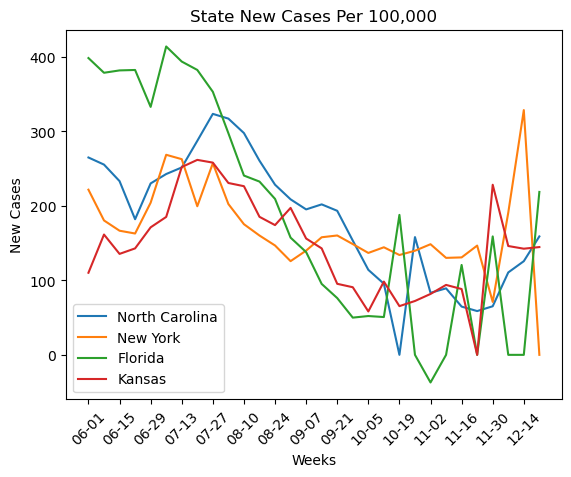

In [19]:
plt.plot(nc_cases_x, nc_cases_normalized, label = 'North Carolina')
plt.plot(ny_cases_x, ny_cases_normalized, label = 'New York')
plt.plot(fl_cases_x, fl_cases_normalized, label = 'Florida')
plt.plot(ks_cases_x, ks_cases_normalized, label = 'Kansas')
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('State New Cases Per 100,000')
plt.xticks(nc_cases_x[::2], rotation = 45)
plt.legend()
plt.show()

### New Cases Analysis Across States
For the most part, the new cases are very similar across states in comparison to the US as a whole. Still, there are some subtle differences to examine.

Florida and North Carolina have a higher rate of cases than the other two during the summer months. I believe this is due to summer tourism, Florida in particular.

New York has a relatively consistent rate of cases for the entire half of the year. This might be due to the fact that there are no tourist destinations that are seasonal. As an example, New York City remains a viable tourist destination the entire year.

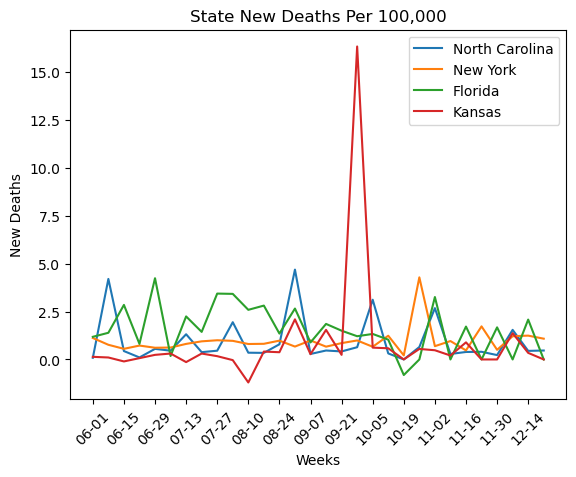

In [20]:
plt.plot(nc_deaths_x, nc_deaths_normalized, label = 'North Carolina')
plt.plot(ny_deaths_x, ny_deaths_normalized, label = 'New York')
plt.plot(fl_deaths_x, fl_deaths_normalized, label = 'Florida')
plt.plot(ks_deaths_x, ks_deaths_normalized, label = 'Kansas')
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('State New Deaths Per 100,000')
plt.xticks(nc_deaths_x[::2], rotation = 45)
plt.legend()
plt.show()

### New Deaths Analysis Across States
The deaths data is less revealing. Similar to the US deaths data, it is all over the place. Still, there are a few notable peaks. In particular, the peaks around the end of August and the end of October are visible in both the states data and the US data.

For the last week in August, this is likely a common time families with children travel as this is the last week before school begins for many children. It may also be possible that this is the first week of school for primary grade students, so they have  higher exposure to other people. Regardless of the specifics, I do think it revolves around children. This peak isn't prominent in the cases data for either the states or the US, and I think that's because, while the number of cases doesn't shift substantially, who is getting these cases does, and since children are getting it more during this week and they generally have weaker immune systems than adults, they're more at risk to die than adults, driving the death rate up.

The peak at the end of October likely has a very similar and sad explanation: Halloween. This peak does show up in the cases data, which makes sense; unlike the first week of school, it isn't just children that are involved in Halloween; parents have to escort their children, and their neighbors give out candy, so plenty of adults are exposed during this time, too. It isn't surprising to see the death rate shoot up during this time in both the states and US data.

Finally, there is a rather large elephant in the room, and that is the fact that apparently people are coming back from the dead. As you can see, there are dips below zero, implying that between days, negative people died. What I've learned from working with this data is it's extremely unreliable, likely due to recording issues. As such, at the end of the day, I say that this data can't be trusted, and therefore, any results from it can't be trusted, either.

## Section III: Counties Analysis
The final section of this notebook focuses on counties in North Carolina with high cases and death rates. 

The methodology will be to calculate weekly cases and deaths for each county and store these values in lists. We can the iterate through these lists and calculate the counties with the highest median cases and deaths. It's important to note that the counties with the highest cases might not be the same as those with the highest deaths, so it's important to perform this process twice for both cases and deaths.

It's important to note that I will take the time to normalize the data for each county per 100,000 people. If I do not, this analysis will favor counties with high populations, and that's not particularly useful.

Once the counties with the highest cases and deaths have been calculated, their datasets can be plotted and compared to the dataset for North Carolina as a whole. We will then wrap up with some analysis.

In [21]:
county_cases = []
county_deaths = []

# get start and end indices
start_index = nc_df.columns.get_loc("cases 2022-06-01")
end_index = nc_df.columns.get_loc("cases 2022-12-31")

first_index = nc_df.index[0]

# populate county cases list
for i in range(first_index, first_index + nc_df.shape[0]):
    curr_row = nc_df.loc[[i]]
    county_weekly_cases = cumulate_weekly_data_columns(curr_row, start_index, end_index)[1]
    county_name = curr_row.iloc[0]['County Name']
    county_population = curr_row.iloc[0]['population']
    county_tuple = (county_name, county_population, county_weekly_cases)
    county_cases.append(county_tuple)
    
# get start and end indices
start_index = nc_df.columns.get_loc("deaths 2022-06-01")
end_index = nc_df.columns.get_loc("deaths 2022-12-31")
    
# populate county deaths list
for i in range(first_index, first_index + nc_df.shape[0]):
    curr_row = nc_df.loc[[i]]
    county_weekly_death = cumulate_weekly_data_columns(curr_row, start_index, end_index)[1]
    county_name = curr_row.iloc[0]['County Name']
    county_population = curr_row.iloc[0]['population']
    county_tuple = (county_name, county_population, county_weekly_death)
    county_deaths.append(county_tuple)


In [42]:
nf = 100000

# calculate counties with highest cases
highest_cases = [('na', 0, [], []), ('na', 0, [], []), ('na', 0, [], [])]
for county in county_cases:
    # calculate median of current county
    normalized_county = normalize(county[2], county[1], nf)
    curr_median = stat.median(normalized_county)

    # compare to current highest counties
    for i in range (0, len(highest_cases)):
        if highest_cases[i][1] < curr_median:
            prev_highest = highest_cases[i]
            for j in range (i + 1, len(highest_cases)):
                temp = highest_cases[j]
                highest_cases[j] = prev_highest
                prev_highest = temp
            new_highest_county = (county[0], curr_median, county[2], normalized_county)
            highest_cases[i] = new_highest_county
            break

print('%-20s %5.2f' % (highest_cases[0][0], highest_cases[0][1]))
print('%-20s %5.2f' % (highest_cases[1][0], highest_cases[1][1]))
print('%-20s %5.2f' % (highest_cases[2][0], highest_cases[2][1]))

Yadkin County        292.03
Robeson County       262.20
Swain County         238.25


In [41]:
nf = 100000

# calculate counties with highest deaths
highest_deaths = [('na', 0, [], []), ('na', 0, [], []), ('na', 0, [], [])]
for county in county_deaths:
    # calculate median of current county
    normalized_county = normalize(county[2], county[1], nf)
    curr_median = stat.median(normalized_county)

    # compare to current highest counties
    for i in range (0, len(highest_deaths)):
        if highest_deaths[i][1] < curr_median:
            prev_highest = highest_deaths[i]
            for j in range (i + 1, len(highest_deaths)):
                temp = highest_deaths[j]
                highest_deaths[j] = prev_highest
                prev_highest = temp
            new_highest_county = (county[0], curr_median, county[2], normalized_county)
            highest_deaths[i] = new_highest_county
            break

print('%-20s %5.2f' % (highest_deaths[0][0], highest_deaths[0][1]))
print('%-20s %5.2f' % (highest_deaths[1][0], highest_deaths[1][1]))
print('%-20s %5.2f' % (highest_deaths[2][0], highest_deaths[2][1]))

Surry County          2.09
Nash County           1.06
Cleveland County      1.02


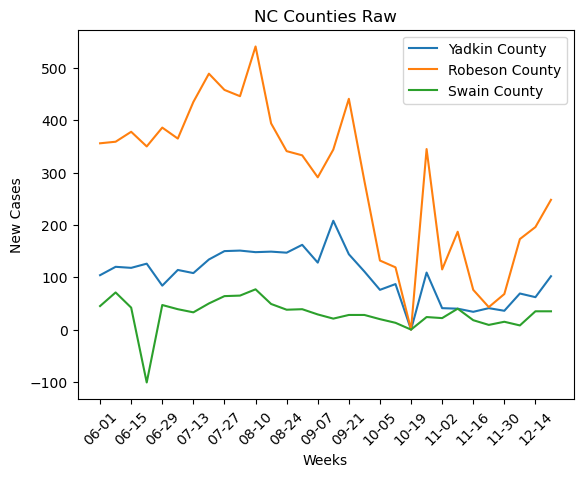

In [48]:
# graph cases data
plt.plot(nc_cases_x, highest_cases[0][2], label = highest_cases[0][0])
plt.plot(nc_cases_x, highest_cases[1][2], label = highest_cases[1][0])
plt.plot(nc_cases_x, highest_cases[2][2], label = highest_cases[2][0])
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('NC Counties Cases Raw')
plt.xticks(nc_cases_x[::2], rotation = 45)
plt.legend()
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1970399254.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nc_cases_x, np.log10(highest_cases[0][3]), label = highest_cases[0][0])
C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1970399254.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nc_cases_x, np.log10(highest_cases[1][3]), label = highest_cases[1][0])
C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1970399254.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nc_cases_x, np.log10(highest_cases[2][3]), label = highest_cases[2][0])
C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1970399254.py:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(nc_cases_x, np.log10(highest_cases[2][3]), label = highest_cases[2][0])


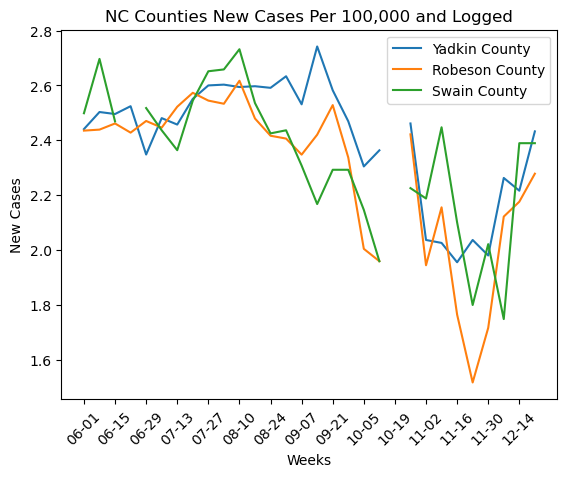

In [49]:
# graph cases data
plt.plot(nc_cases_x, np.log10(highest_cases[0][3]), label = highest_cases[0][0])
plt.plot(nc_cases_x, np.log10(highest_cases[1][3]), label = highest_cases[1][0])
plt.plot(nc_cases_x, np.log10(highest_cases[2][3]), label = highest_cases[2][0])
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('NC Counties New Cases Per 100,000 and Logged')
plt.xticks(nc_cases_x[::2], rotation = 45)
plt.legend()
plt.show()

### Counties Cases Analysis.
First, let's talk about general patterns. In general, these counties do follow the overarching state pattern; high cases during the summer months, and peaks near the end of August and October. Like I've stated prior in this report, these are likely due to summer travel and Halloween.

Next, lets take a look at individual counties. I went ahead and did some research on each of the counties.

First, lets talk about Swain County. Swain County is a far western county. It's population is 14,136 as of 2021, so it is a very small county in terms of population. One thing to note is that it is home to a Native American reservation; about a third of the county's population is Native American. Furthermore, 18.3% of the population lives below the poverty line, almost 50% more than the national average of 11.6%. This isn't too surprising considering many people who live on reservations tend to be poor. My guess as to why this county was hit particularly hard is due to cramped and poor living conditions on reservations and inadequate access to healthcare.

Robeson County is yet another similar story, located in the South. In contrast, it has a much larger population of 116,530 people. It has a large mix of ethnicities, although Native American is the largest at 38%. White and black each are at 22%, and hispanic makes up 10% of the population. In Robeson County, 27.9% of the population lives below the poverty line, which is more than 100% more than the national average. Similar to Swain County, Robeson County is likely at risk due to poor living conditions and inadequate access to healthcare.

Yadkin County is a Northwestern county and home to 37,214 people. Unlike the previous two counties, there are very few minorities living here; 92.54% of the population is white. Furthermore, only 10% of the population lives below the poverty line, which is slightly less than the national average. In conclusion, based on a cursory glance, it's difficult to chalk up the infection rate to socioeconomic factors. A deeper analysis into Yadkin County would be required to properly conclude causality.

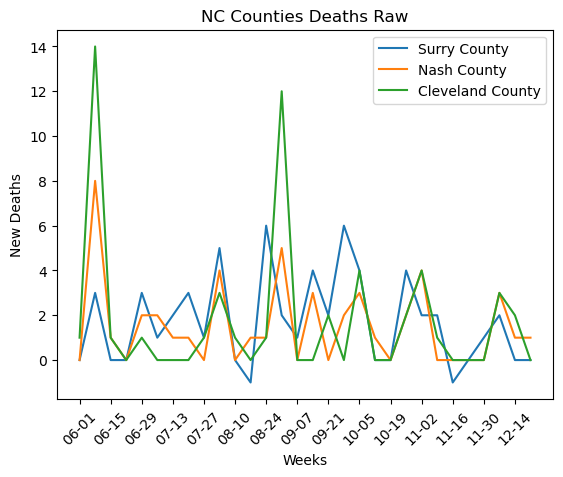

In [51]:
# graph deaths data
plt.plot(nc_deaths_x, highest_deaths[0][2], label = highest_deaths[0][0])
plt.plot(nc_deaths_x, highest_deaths[1][2], label = highest_deaths[1][0])
plt.plot(nc_deaths_x, highest_deaths[2][2], label = highest_deaths[2][0])
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('NC Counties Deaths Raw')
plt.xticks(nc_deaths_x[::2], rotation = 45)
plt.legend()
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1055913860.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nc_deaths_x, np.log10(highest_deaths[0][3]), label = highest_deaths[0][0])
C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1055913860.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(nc_deaths_x, np.log10(highest_deaths[0][3]), label = highest_deaths[0][0])
C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1055913860.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nc_deaths_x, np.log10(highest_deaths[1][3]), label = highest_deaths[1][0])
C:\Users\calvi\AppData\Local\Temp\ipykernel_236\1055913860.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nc_deaths_x, np.log10(highest_deaths[2][3]), label = highest_deaths[2][0])


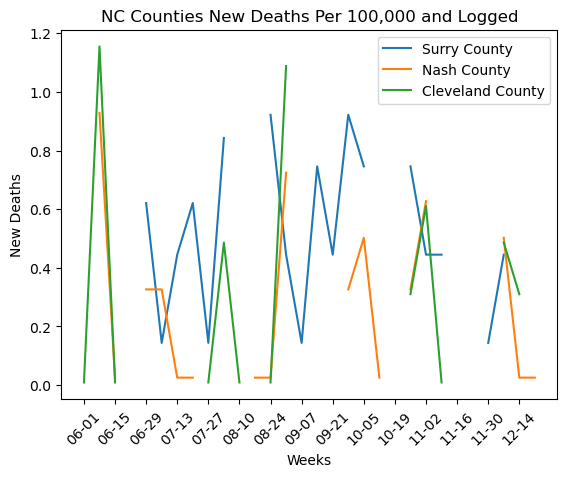

In [50]:
# graph deaths data
plt.plot(nc_deaths_x, np.log10(highest_deaths[0][3]), label = highest_deaths[0][0])
plt.plot(nc_deaths_x, np.log10(highest_deaths[1][3]), label = highest_deaths[1][0])
plt.plot(nc_deaths_x, np.log10(highest_deaths[2][3]), label = highest_deaths[2][0])
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('NC Counties New Deaths Per 100,000 and Logged')
plt.xticks(nc_deaths_x[::2], rotation = 45)
plt.legend()
plt.show()

### Counties Deaths Analysis
Looking at the counties graphs, there are two notable peaks: one at the beginning of June, and another at the end of August. These are both present in the state graph. I'm not sure why the beginning of June is particularly popular; there isn't anything special about that week, so it might just be chance that that week was particularly deadly. I've already stated my thoughts earlier on possible explanations for the peak at the end of August; families travel before school begins for children and the first week of school exposes many children to Covid again.

I'll once again run through each county individually.

Surry County is located in the Northwest and is home to 71,359 people. It is mostly white, which makes up 90.4% of the population. 16.1% of the population lives in poverty. Similar to Yadkin County, there isn't enough information from demographics alone to strongly conclude any causality, although it is worth noting that the poverty rate is higher than the national average.

Nash County is a central county with a population of 94,970. It has a relatively diverse racial background; whites make up 48.77% of the population while blacks make up 38.62% of the population. 13.4% of the population lives in poverty. Aside from the diverse racial background, there isn't much to point to for causality. More research would be necessary to properly conclude anything.

Cleveland County is a Southwestern state and is home to 99,519 people. Whites make up 70.5% of the populatio while blacks make up 20.13% of the population. 13.3% of the population lives in poverty. Once again, there isn't enough demographic information to  make any strong conclusions.

What I find interesting was there appeared to be a strong correlation between demographic information and new cases, but not between demographic information and new deaths. It's possible the death rate is strongly tied to something else that isn't demographics. What that other factor is would require more research.